<h1>Exercise description</h1>

1)   Examples
Work through the Jupyter Notebook «DSF_05_Crime_Prep_Cleansing.ipynb»
and look at the example codes provided.

2)  Exercise
Perform the following analysis on one of the data sets prepared for you (folder “data”), or optionally on your own data. For this purpose, you can use the sample codes provided.

Detect Outliers (e.g. using Boxplots)
Discuss the results of at least 5 columns by explaining the median, the whiskers, the quartiles and the outliers. Do the results meet your expectations? Why so or why not? (5 x appr. 100 words)
Bonus: Handle the outliers by either removing them or predefining the whiskers. Explain your solution.

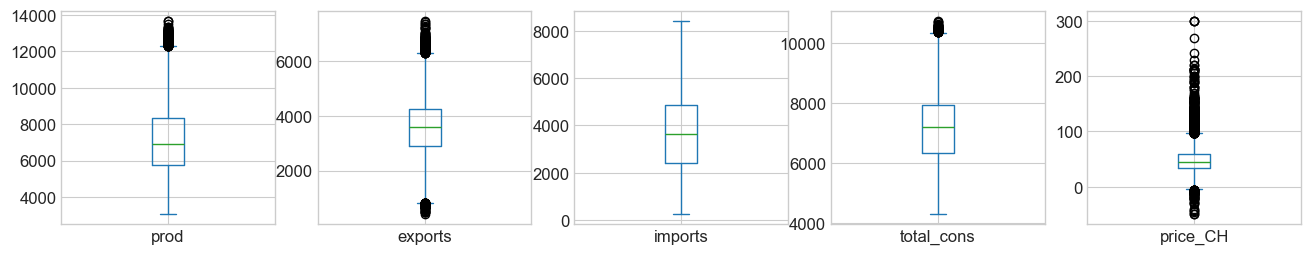

In [2]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-whitegrid')
#plt.style.use('seaborn')
#plt.style.use('ggplot')
%matplotlib inline

# Load Swissgrid data
df = pd.read_csv('cases/Swissgrid/hourly_data.csv', parse_dates=True, delimiter=',')

# Change date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Check and cleanup empty values
df.isnull().sum()
df = df.dropna()

# Check and cleanup duplicates
df = df.drop_duplicates()
# No duplicates in dataset, but leaving this in for future use

#Display Botplots
df_analyze = df[["prod", "exports", "imports", "total_cons", "price_CH"]]
df_analyze.plot(kind="box", subplots=True, layout= (5,5), fontsize=12, figsize=(16,16));


In [3]:
# Output the outliers
for label, content in df_analyze.items():
        Q1 = content.quantile(0.25)
        Q3 = content.quantile(0.75)
        IQR = Q3 - Q1
        v_col = content[(content <= Q1 - 1.5 * IQR) | (content >= Q3 + 1.5 * IQR)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Spalte {} Anteil an Outliers = {}%".format(label, round(perc, 2)))

Spalte prod Anteil an Outliers = 0.2%
Spalte exports Anteil an Outliers = 0.27%
Spalte imports Anteil an Outliers = 0.0%
Spalte total_cons Anteil an Outliers = 0.06%
Spalte price_CH Anteil an Outliers = 0.76%


<h1>Explanation</h1>
<h2>prod - Production</h2>
The median makes sense when checking the swissgrid stats on their website. The top outliers are more double than the median. This can every much be the case, that in rare peak time, Switzerland needs double the median. It seems to macht the total consuption. I suspect the production peaks are handled via dams.

<h2>exports - Exports</h2>
Makes sense that the outliers are on both sides here. This means in peak times, export go to almost 0, but in times where there is way more energy available exports go higher - almost the same amount as the production median. Exports only go as high, when all other energy storage solutions have been exhausted I think - dams f.e.

<h2>imports - Imports</h2>
Imports are pretty stable, no outliers here. Since Switzerland does have means to store energy in dams, and can use those for short peaks - at least the prod, exports and total_cons boxplot indicates so.

<h2>total_cons - Total Consumption</h2>
Total consuption of energy matches the data of production and imports. There are peaks, that explain why production needs to have peaks as wel when imports are stable.

<h2>price_CH - Energy price Switzerland</h2>
Price of energy fluctiates according to production and demand. When there is high demand, prices go up. At the same time, exports go down, since Switzerland has a high purchasing power. The prices go down when there is more energy produced than needed, and the exports go up at this point.


<h1>Bonus task - outlier removal<h1>

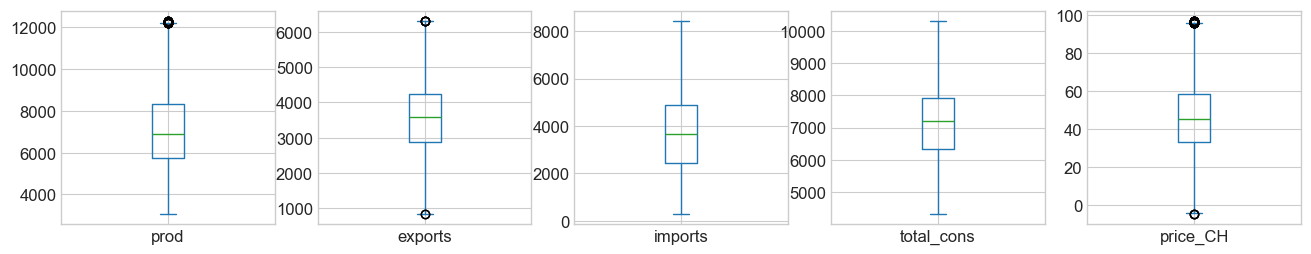

In [7]:
# Identify and remove outliers using the IQR method
def remove_outliers(column):
    Q1 = df_analyze[column].quantile(0.25)
    Q3 = df_analyze[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df_analyze[(df_analyze[column] >= lower_bound) & (df_analyze[column] <= upper_bound)]

# Apply outlier removal to each column
for column in df_analyze.columns:
    df_analyze = remove_outliers(column)

# Display boxplots after outlier removal
df_analyze.plot(kind="box", subplots=True, layout= (5,5), fontsize=12, figsize=(16,16));

<h3>Explanation</h3>
With the IQR method, we find all the outliers, as used above. This is then applied to each colum in the dataframe, and those columns are removed.